# figs_d25a.ipynb
Analyse high-end and low-end projections and produce figures.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.1
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2024.11.0

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Written s01.pdf (0.02 MB)
Written s01.png (0.17 MB)


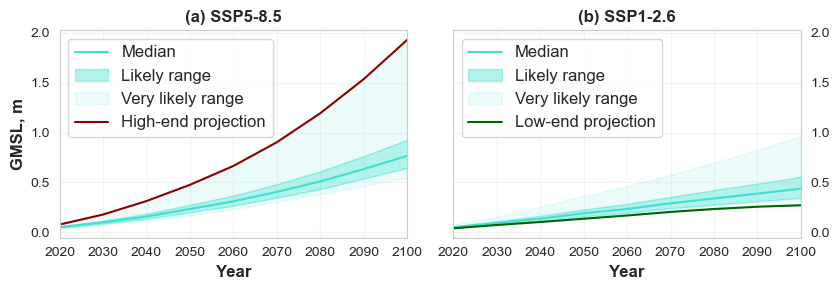

In [4]:
# Plot time series of GMSL
fig, axs = d25a.fig_fusion_timeseries(gauge=None)
_ = d25a.name_save_fig(fig, fso='s')

Written fig01.pdf (0.03 MB)
Written fig01.png (0.18 MB)


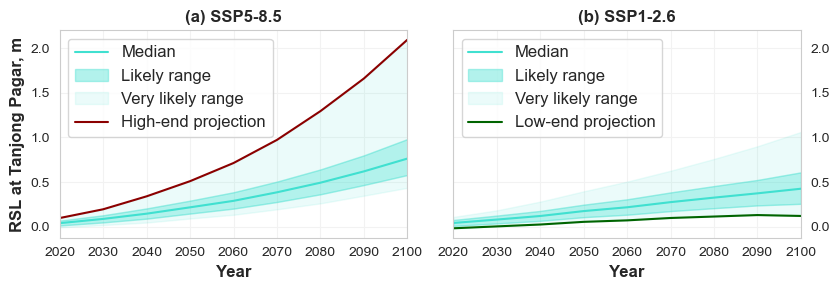

In [5]:
# Plot time series of RSL for Singapore
fig, axs = d25a.fig_fusion_timeseries(gauge='TANJONG_PAGAR')
_ = d25a.name_save_fig(fig, fso='f')

In [6]:
# Get high-end and low-end projections and show summary statistics
proj_df = d25a.get_info_high_low_exceed_df(rsl_novlm='rsl')
proj_df.describe()

,lat,lon,high,low,central,p_ex_high_ssp585,p_ex_high_ssp126,p_ex_low_ssp585,p_ex_low_ssp126,p_ex_central_ssp585,p_ex_central_ssp126
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1.016000e+03,1016.000000,1016.000000,1.016000e+03,1016.000000,1016.000000
mean,30.538543,29.344902,1.947700,0.137711,0.536375,5.000000e-02,0.001153,0.993100,9.500000e-01,0.863275,0.234806
std,30.716980,94.763899,0.370585,0.300973,0.282192,6.942311e-18,0.001635,0.010583,2.221540e-16,0.059910,0.047520
min,-65.250000,-179.370000,-0.095559,-1.861529,-1.456000,5.000000e-02,0.000000,0.851400,9.500000e-01,0.365500,0.138600
25%,16.830000,-57.980000,1.803949,0.077978,0.471000,5.000000e-02,0.000700,0.993400,9.500000e-01,0.837175,0.205750
50%,36.960000,18.740000,1.999809,0.174574,0.567000,5.000000e-02,0.000900,0.995100,9.500000e-01,0.865100,0.229200
75%,52.965000,126.545000,2.164632,0.259294,0.643625,5.000000e-02,0.001400,0.995700,9.500000e-01,0.899000,0.253850
max,80.620000,179.220000,3.969382,1.955471,2.357000,5.000000e-02,0.031500,0.998500,9.500000e-01,0.953800,0.604500


In [7]:
# Table summarising some of the key results
d25a.get_summary_df()

,low,central,high
GMSL,0.3 m,0.6 m,1.9 m
RSL median,0.2 m,0.6 m,2.0 m
RSL IQR,0.1 to 0.3 m,0.5 to 0.6 m,1.8 to 2.2 m
RSL range,-1.9 to 2.0 m,-1.5 to 2.4 m,-0.1 to 4.0 m
P(RSL > projection | SSP5-8.5) median,99.5 %,86.5 %,5.0 %
P(RSL > projection | SSP5-8.5) IQR,99.3 to 99.6 %,83.7 to 89.9 %,5.0 to 5.0 %
P(RSL > projection | SSP5-8.5) range,85.1 to 99.9 %,36.5 to 95.4 %,5.0 to 5.0 %
P(RSL > projection | SSP1-2.6) median,95.0 %,22.9 %,0.1 %
P(RSL > projection | SSP1-2.6) IQR,95.0 to 95.0 %,20.6 to 25.4 %,0.1 to 0.1 %
P(RSL > projection | SSP1-2.6) range,95.0 to 95.0 %,13.9 to 60.5 %,0.0 to 3.1 %


Written fig02.pdf (0.08 MB)
Written fig02.png (0.24 MB)


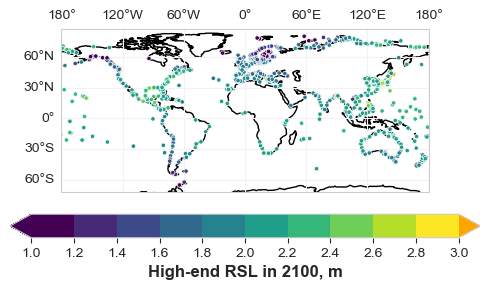

In [8]:
# Plot map showing high-end projection
fig, ax = d25a.fig_high_map(high_low='high')
_ = d25a.name_save_fig(fig, fso='f')

In [9]:
# Get country-level statistics and show values for countries with at least 4 gauges
country_stats_df = d25a.get_country_stats_df(rsl_novlm='rsl')
country_stats_df = country_stats_df.where(country_stats_df['count'] >= 4).dropna()
country_stats_df = country_stats_df.sort_values(by='high_med', ascending=False)
country_stats_df = country_stats_df.reset_index()
country_stats_df.round(decimals=1)

,index,country,count,high_med,high_min,high_max,low_med,low_min,low_max,central_med,central_min,central_max
0,59,MARSHALL ISLANDS,5.0,2.3,2.3,2.4,0.3,0.2,0.3,0.7,0.6,0.7
1,62,"MICRONESIA, FEDERATED STATES OF",4.0,2.3,2.2,2.3,0.3,0.2,0.3,0.6,0.6,0.7
2,47,JAPAN,116.0,2.2,0.2,4.0,0.2,-1.9,2.0,0.6,-1.5,2.4
3,50,KIRIBATI,4.0,2.2,2.2,2.3,0.2,0.2,0.2,0.6,0.6,0.6
4,105,UNITED STATES,133.0,2.2,-0.1,2.9,0.4,-1.7,1.0,0.7,-1.4,1.4
5,61,MEXICO,14.0,2.2,2.0,2.5,0.4,0.2,0.7,0.7,0.5,1.0
6,80,PHILIPPINES,8.0,2.2,2.1,2.7,0.2,0.1,0.7,0.6,0.5,1.1
7,52,"KOREA, REPUBLIC OF",23.0,2.1,1.9,2.4,0.2,-0.0,0.5,0.6,0.4,0.8
8,4,BANGLADESH,4.0,2.1,1.9,2.5,0.2,0.0,0.6,0.6,0.5,1.1
9,77,PANAMA,5.0,2.1,2.1,2.2,0.3,0.2,0.3,0.6,0.6,0.7


Written fig03.pdf (0.03 MB)
Written fig03.png (0.43 MB)


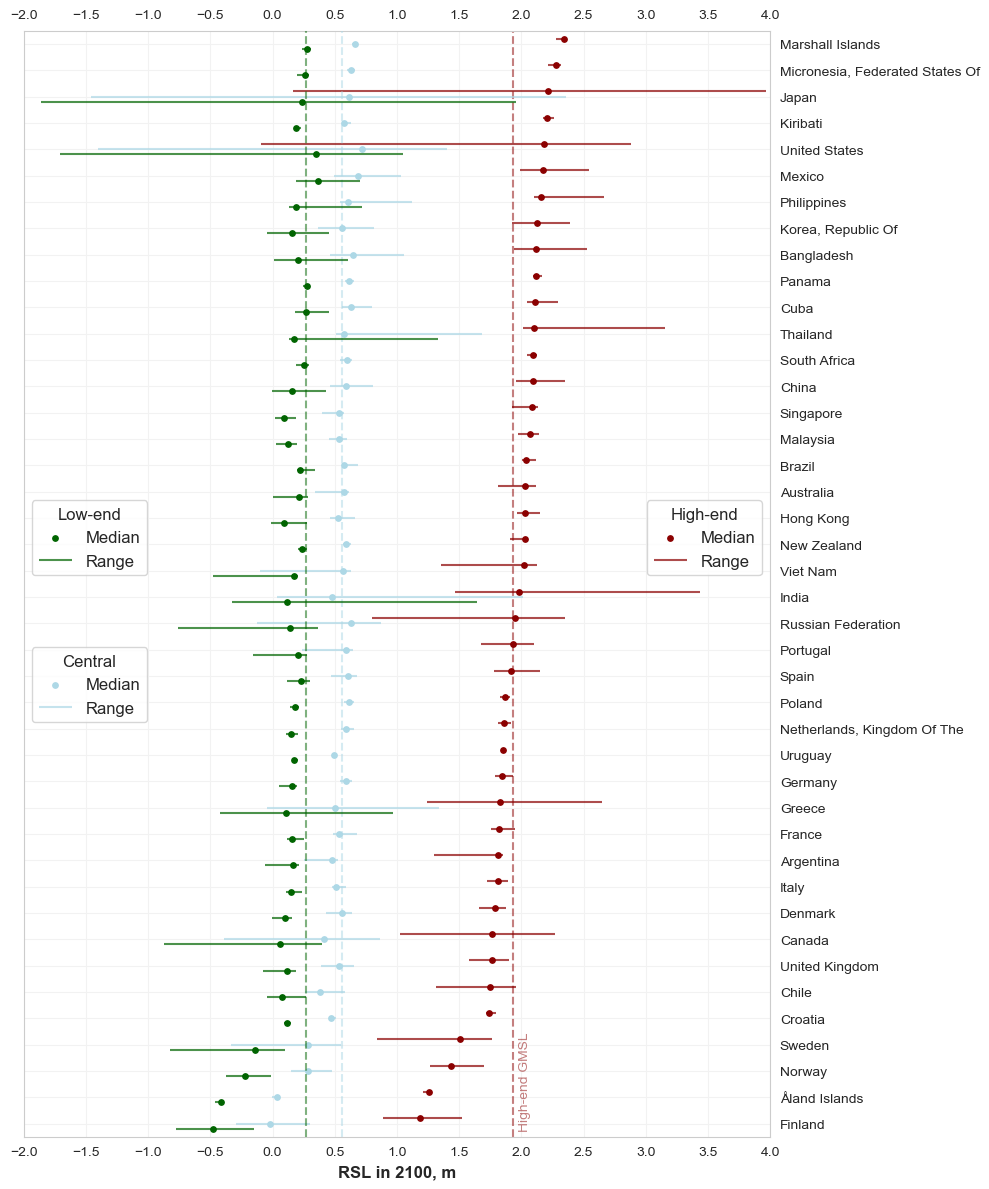

In [10]:
# Plot country-level median, min, and max of high-end, low-end, and central projections for 2100
fig, axs = d25a.fig_country_stats(rsl_novlm='rsl', min_count=4)
_ = d25a.name_save_fig(fig, fso='f')

Written s02.pdf (0.03 MB)
Written s02.png (0.31 MB)


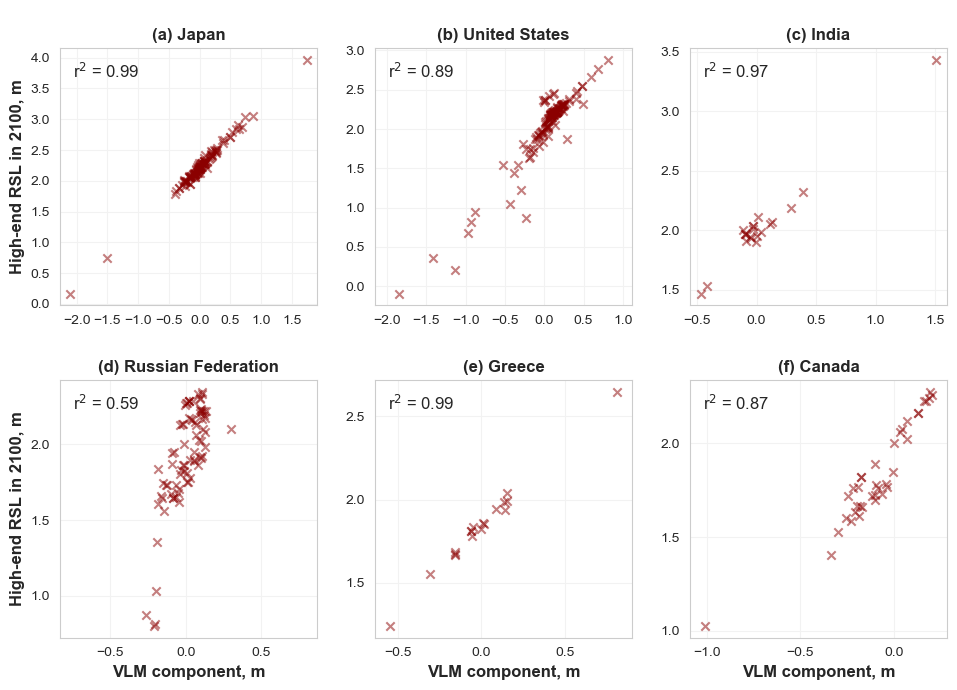

In [11]:
# Plot RSL vs VLM component of high-end projections for countries with the largest RSL ranges.
fig, axs = d25a.fig_rsl_vs_vlm()
_ = d25a.name_save_fig(fig, fso='s')

Written fig04.pdf (0.02 MB)
Written fig04.png (0.10 MB)


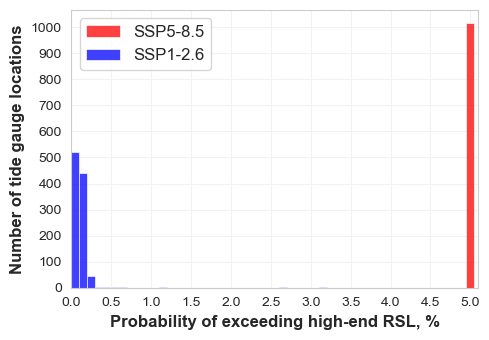

In [12]:
# Plot histogram showing probability of exceeding high-end projection at tide gauge locations
fig, ax = d25a.fig_p_exceed()
_ = d25a.name_save_fig(fig, fso='f')

In [13]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-01-09 17:58:15
End:       2025-01-09 17:58:25
Wall time: 9 s
